# Hypothesis: Students in Section 1 (Sync + Async) of COMP 110 were more likely to take notes

In [155]:
__author__ = "730236759"

In [156]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled.")

Autoreload of imported modules enabled.


## The next piece of code is basically a way to access the survey data. The DATA_DIRECTORY constant moves us two directories up out of the pjo1 directory (one "../" represents moving up one directory). Them the DATA_FILE_PATH constant references the path to the data file you will use to test your functions in this exercise.

In [157]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

## The purpose of the next block of code is to rewrite the survey data as a list of rows of dictionaries with keys and values both as strings (`dict[str, str]`)

In [158]:
from data_utils import read_csv_rows

data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)

print(f"Data File Read: {DATA_FILE_PATH}")
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")
print(f"Columns names: {data_rows[0].keys()}")

Data File Read: ../../data/survey.csv
502 rows
36 columns
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend'])


## The next block of code isolates the responses to the survey about which section of COMP 110 each person is in 

Students responded to their section with the following possible values: Section 1 - 3:30pm - Sync + Async, Section 2 - 5:00pm - Async


In [159]:
from data_utils import column_values

section: list[str] = column_values(data_rows, "section")

print(f"Column 'section' has {len(section)} values.")
print("The first five values are:")
for i in range(5):
    print(section[i])

Column 'section' has 502 values.
The first five values are:
Section 2 - 5:00pm - Async
Section 1 - 3:30pm - Sync + Async
Section 1 - 3:30pm - Sync + Async
Section 1 - 3:30pm - Sync + Async
Section 1 - 3:30pm - Sync + Async


## The next block of code isolates the responses to the survey about how often students took their own notes

Students responded to how often they kept their own notes for topics covered in lecture. Possible values (1 being Never and 7 being Always): 1, 2, 3, 4, 5, 6, 7

In [160]:
from data_utils import column_values

own_notes: list[str] = column_values(data_rows, "own_notes")

for i in range(5):
    print(own_notes[i])

7
6
6
6
5


## The next block of code transforms the survey data from a list of rows into a dictionary of columns

This makes the data easier to process in the rest of our functions.

In [161]:
from data_utils import columnar

data_cols: dict[str, list[str]] = columnar(data_rows)

print(f"{len(data_cols.keys())} columns")
print(f"{len(data_cols['prior_exp'])} rows")
print(f"Columns names: {data_cols.keys()}")

36 columns
502 rows
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend'])


## The next block of code imports the tabulate function and then uses an example to be sure it was imported and works.

The _tabulate_ function reads Python's str representations of tabular data as an actual table

In [162]:
from tabulate import tabulate

holidays: dict[str, list[str, str]] = {"Holiday": ["Easter", "Thanksgiving", "Christmas"], "Month": ["April", "November", "December"], "Representative Figure": ["Easter Bunny", "Turkey", "Christmas Tree"]}

tabulate(holidays, holidays.keys(), "html")

Holiday,Month,Representative Figure
Easter,April,Easter Bunny
Thanksgiving,November,Turkey
Christmas,December,Christmas Tree


## The next block of data isolated the two variables we are looking at (section and own_notes) 

The other information in the survey data is interesting, but it is not necessary to solve our hypothesis. It will just make it more difficult to look at the data. 

We then make sure that this worked correctly by running the data through the head function which allows us to print only the first 20 values. We do not want to print all 502 values as states before because that is very overwhelming to look at. 

In [163]:
from data_utils import select, head

selected_data: dict[str, list[str]] = select(data_cols, ["row_number", "section", "own_notes"])

tabulate(head(selected_data, 20), selected_data.keys(), "html")

row_number,section,own_notes
0,Section 2 - 5:00pm - Async,7
1,Section 1 - 3:30pm - Sync + Async,6
2,Section 1 - 3:30pm - Sync + Async,6
3,Section 1 - 3:30pm - Sync + Async,6
4,Section 1 - 3:30pm - Sync + Async,5
5,Section 1 - 3:30pm - Sync + Async,2
6,Section 1 - 3:30pm - Sync + Async,4
7,Section 1 - 3:30pm - Sync + Async,7
8,Section 1 - 3:30pm - Sync + Async,6
9,Section 1 - 3:30pm - Sync + Async,7


## Next we will convert the "own_notes" list from a list of strs to a list of ints

In [164]:
for i in range(0, len(own_notes)):
    own_notes[i] = int(own_notes[i])

print(own_notes)

[7, 6, 6, 6, 5, 2, 4, 7, 6, 7, 7, 1, 7, 7, 5, 6, 7, 4, 7, 4, 7, 7, 6, 7, 6, 4, 1, 7, 6, 6, 4, 4, 7, 7, 6, 4, 4, 7, 5, 4, 4, 6, 7, 4, 4, 6, 4, 5, 7, 7, 7, 6, 7, 7, 7, 4, 7, 5, 4, 5, 7, 4, 4, 6, 4, 4, 7, 6, 6, 7, 7, 4, 5, 7, 5, 6, 6, 7, 7, 7, 4, 7, 4, 7, 7, 5, 7, 7, 7, 4, 7, 5, 6, 7, 4, 7, 5, 5, 5, 4, 7, 7, 5, 6, 5, 7, 6, 5, 7, 7, 6, 3, 7, 7, 2, 7, 7, 7, 2, 7, 7, 6, 1, 7, 1, 7, 5, 7, 3, 7, 6, 7, 4, 7, 6, 2, 6, 7, 5, 7, 6, 6, 5, 6, 5, 7, 7, 7, 5, 5, 6, 7, 7, 6, 6, 5, 6, 3, 7, 6, 6, 6, 7, 5, 7, 7, 2, 6, 7, 5, 7, 7, 6, 6, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 6, 7, 4, 7, 7, 6, 4, 7, 7, 5, 6, 7, 7, 6, 6, 7, 5, 4, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 3, 2, 7, 7, 7, 7, 2, 2, 7, 7, 7, 7, 7, 3, 5, 7, 7, 7, 7, 5, 5, 5, 5, 7, 7, 4, 4, 7, 7, 7, 7, 4, 7, 6, 7, 7, 5, 7, 7, 7, 2, 5, 7, 5, 5, 6, 6, 2, 7, 7, 7, 6, 5, 7, 6, 7, 3, 2, 7, 6, 7, 4, 5, 5, 5, 1, 7, 7, 7, 6, 2, 6, 7, 7, 5, 7, 7, 7, 7, 7, 7, 3, 6, 6, 7, 7, 7, 6, 7, 6, 7, 7, 7, 7, 7, 5, 7, 6, 5, 6, 2, 7, 5, 6, 6, 4, 3, 4, 7, 7, 7, 7, 5, 

## Now that we have seen a more condensed version of the data, lets compare the 2 sets

## First, we will figure out how many people reported a 5 or more out of 7 for how often they took notes. We will be using this as the category for people who took notes frequemtly. 

In [165]:
def greater_than(column: list[int], greatest: int) -> list[bool]:
    note_takers: list[bool] = []
    for item in column:
        note_takers.append(item >= greatest)
    return note_takers

regular_notes = greater_than(own_notes, 5)
print(lots_of_notes)

[True, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, True, False, True, False, True, True, True, True, True, False, False, True, True, True, False, False, True, True, True, False, False, True, True, False, False, True, True, False, False, True, False, True, True, True, True, True, True, True, True, False, True, True, False, True, True, False, False, True, False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, False, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, Tr

## The following function filters through the section column and sorts it into section 1 or 2. It takes in a list of strings and a str and returns a list of booleans

In [166]:
def section_separater(column: list[str], section: str) -> list[bool]:
    section_list: list[bool] = []
    for item in column:
        section_list.append(item == section)
    return section_list


section_1 = section_separater(selected_data["section"], "Section 1 - 3:30pm - Sync + Async")
section_2 = section_separater(selected_data["section"], "Section 2 - 5:00pm - Async")
print(f"section 1's: {section_1} ")
print(f"section 2's: {section_2} ")

section 1's: [False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, False, False, True, True, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, Tr

## Next, using a mask function, the data will be seprated by section and frequency. 

There will be four categories frequent notetakers in section 1, frequent notetakers in section 2, infrequent notetakers in section 1 and infrequent notetakers in section 2. 

In [167]:
note_taking_dict: dict[str, list[int]] = {}

def positive_masked(col: list[bool], mask: list[bool]) -> list[int]:
    result: list[str] = []
    for i in range(len(mask)):
        if mask[i] and col[i]:
            result.append(own_notes[i])
    return result


def negative_masked(col: list[bool], mask: list[bool]) -> list[int]:
    result: list[str] = []
    for i in range(len(mask)):
        if not mask[i] and col[i]:
            result.append(own_notes[i])
    return result


section1_notetakers = positive_masked(section_1, regular_notes)
section2_notetakers = positive_masked(section_2, regular_notes)
section1_non_notetakers = negative_masked(section_1, regular_notes)
section2_non_notetakers = negative_masked(section_2, regular_notes)


note_taking_dict["sect_1_frequent"] = section1_notetakers
note_taking_dict["sect_2_frequent"] = section2_notetakers
note_taking_dict["sect_1_infrequent"] = section1_non_notetakers
note_taking_dict["sect_2_infrequent"] = section2_non_notetakers


tabulate(head(note_taking_dict, 10), note_taking_dict.keys(), "html")

sect_1_frequent,sect_2_frequent,sect_1_infrequent,sect_2_infrequent
6,7,2,2
6,7,4,1
6,7,1,4
5,7,4,2
7,7,4,4
6,7,4,3
7,5,1,4
7,6,4,4
7,6,4,3
7,7,4,4


## The next block of code counts the amount of responses in each category separated above


In [168]:
from data_utils import count

sect_1_regular_counts: dict[str, list[int]] = count(note_taking_dict["sect_1_frequent"])
print(f"sect_1_regular_counts: {sect_1_regular_counts}")

sect_2_regular_counts: dict[str, list[int]] = count(note_taking_dict["sect_2_frequent"])
print(f"sect_2_regular_counts: {sect_2_regular_counts}")

sect_1_infrequent_counts: dict[str, list[int]] = count(note_taking_dict["sect_1_infrequent"])
print(f"sect_1_infrequent_counts: {sect_1_infrequent_counts}")

sect_2_infrequent_counts: dict[str, list[int]] = count(note_taking_dict["sect_2_infrequent"])
print(f"sect_2_infrequent_counts: {sect_2_infrequent_counts}")



sect_1_regular_counts: {6: 81, 5: 56, 7: 171}
sect_2_regular_counts: {7: 61, 5: 18, 6: 13}
sect_1_infrequent_counts: {2: 18, 4: 45, 1: 8, 3: 15}
sect_2_infrequent_counts: {2: 4, 1: 3, 4: 6, 3: 3}


## Next I am going to plot the information for each section so that they can be compared visually 

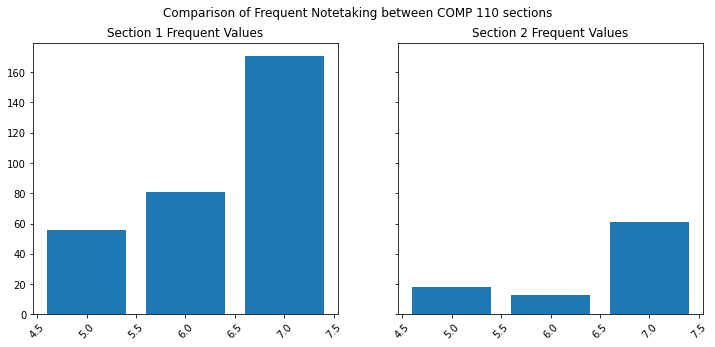

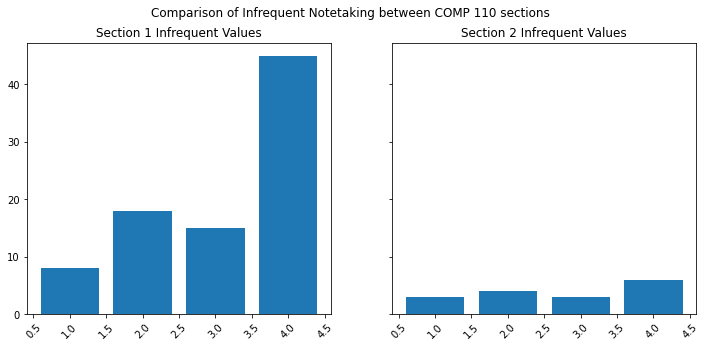

In [169]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Comparison of Frequent Notetaking between COMP 110 sections")


axes[0].set_title("Section 1 Frequent Values")
axes[0].bar(sect_1_regular_counts.keys(), sect_1_regular_counts.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Section 2 Frequent Values")
axes[1].bar(sect_2_regular_counts.keys(), sect_2_regular_counts.values())
axes[1].tick_params(axis='x', labelrotation = 45)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Comparison of Infrequent Notetaking between COMP 110 sections")

axes[0].set_title("Section 1 Infrequent Values")
axes[0].bar(sect_1_infrequent_counts.keys(), sect_1_infrequent_counts.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Section 2 Infrequent Values")
axes[1].bar(sect_2_infrequent_counts.keys(), sect_2_infrequent_counts.values())
axes[1].tick_params(axis='x', labelrotation = 45)



## Although this data seems to support my hypothesis, it would be better to compare the proportions of students that fit into each category.  

#### First, I will total the amount of people in each category

In [170]:
total_sect_1_frequent = len(note_taking_dict["sect_1_frequent"])
total_sect_2_frequent = len(note_taking_dict["sect_2_frequent"])
total_sect_1_infrequent = len(note_taking_dict["sect_1_infrequent"])
total_sect_2_infrequent = len(note_taking_dict["sect_2_infrequent"])
total_sect_1 = total_sect_1_infrequent + total_sect_1_frequent
total_sect_2 = total_sect_2_infrequent + total_sect_2_frequent


total_values = len(selected_data["section"])


print(total_sect_1_frequent)
print(total_sect_2_frequent)
print(total_sect_1_infrequent)
print(total_sect_2_infrequent)
print(total_values)

308
92
86
16
502


### Next, I will find the proportion of each category out of the total number of students

In [171]:
prop_sect_1_frequent: float = total_sect_1_frequent / total_values
prop_sect_2_frequent: float = total_sect_2_frequent / total_values
prop_sect_1_infrequent: float = total_sect_1_infrequent / total_values
prop_sect_2_infrequent: float = total_sect_2_infrequent / total_values


print(prop_sect_1_frequent)
print(prop_sect_2_frequent)
print(prop_sect_1_infrequent)
print(prop_sect_2_infrequent)

0.6135458167330677
0.18326693227091634
0.17131474103585656
0.03187250996015936


### Next, I will find the proportions of frequent and infrequent values within each section

In [172]:
prop_frequent_in_sect_1: float = total_sect_1_frequent / total_sect_1
prop_frequent_in_sect_2: float = total_sect_2_frequent / total_sect_2
prop_infrequent_in_sect_1: float = total_sect_1_infrequent / total_sect_1
prop_infrequent_in_sect_2: float = total_sect_2_infrequent / total_sect_2


print(prop_frequent_in_sect_1)
print(prop_frequent_in_sect_2)
print(prop_infrequent_in_sect_1)
print(prop_infrequent_in_sect_2)

0.7817258883248731
0.8518518518518519
0.2182741116751269
0.14814814814814814


### Finally, I will plot the differentces in a pie chart in order to view them visually 

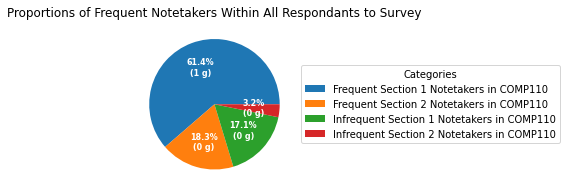

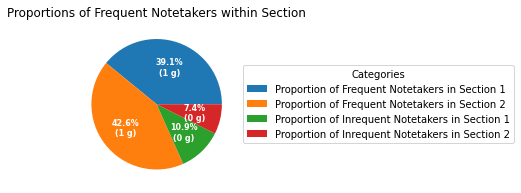

In [173]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

proportions = [f"{prop_sect_1_frequent} Frequent Section 1 Notetakers in COMP110",
          f"{prop_sect_2_frequent} Frequent Section 2 Notetakers in COMP110",
          f"{prop_sect_1_infrequent} Infrequent Section 1 Notetakers in COMP110",
          f"{prop_sect_2_infrequent} Infrequent Section 2 Notetakers in COMP110",]

data = [float(x.split()[0]) for x in proportions]
Categories = ["Frequent Section 1 Notetakers in COMP110", "Frequent Section 2 Notetakers in COMP110", "Infrequent Section 1 Notetakers in COMP110", "Infrequent Section 2 Notetakers in COMP110"]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, Categories,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Proportions of Frequent Notetakers Within All Respondants to Survey")

plt.show()

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

proportions = [f"{prop_frequent_in_sect_1} Proportion of Frequent Notetakers in Section 1",
          f"{prop_frequent_in_sect_2} Proportion of Frequent Notetakers in Section 2",
          f"{prop_infrequent_in_sect_1} Proportion of Inrequent Notetakers in Section 1",
          f"{prop_infrequent_in_sect_2} Proportion of Inrequent Notetakers in Section 2"]

data = [float(x.split()[0]) for x in proportions]
Categories = ["Proportion of Frequent Notetakers in Section 1", "Proportion of Frequent Notetakers in Section 2", "Proportion of Inrequent Notetakers in Section 1", "Proportion of Inrequent Notetakers in Section 2"]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, Categories,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Proportions of Frequent Notetakers within Section")

plt.show()


# Conclusion: 

I found that out of the total amount of people who responded to the survery, there was the greeated proportion of frequent notetakers who were also in section 1. This was 61.4% of the 501 students. Only 18.3% were frequent notetakers and in section 2. But, when the proporion of frequent notetakers within each section is compared there is very little difference. It seems like about the same percent of people frequently take notes in section 1 (39.1%) than section 2 (42.6%) although section 2 did have a slightly higher percentage of frequent notetakers. This makes me think that the extreme differences in percentages of the frequent notetakers that are in section 1 (61.4%) and section 1 (18.3%) was due to the difference in the amount of people that responded that they were in each section. Since there were so many more people that responded that they were in section 1, the section 1 frequent notetakers were a much higher percentage of the total survey population than the section 2 frequent notetakers were. The same thing happened with the people who were infrequent notetakers in each section. There were many more infrequent notetakers in section 1 out of the total population, but the proportion of frequent notetakers within each section was pretty much the same for section 1 and section 2. 

Overall, I think that a slightly higher proportion of section 2 were frequent notetakers. The difference was so small though that it might not have been significant enough to say that section 2 had more frequent notetakers than section 1. Either way, this means that my hypothesis was incorrect. There are not more notetakers in section 1 than section 2 of COMP 110. 